In [62]:
"""
Importing Libraries
* Pandas --> for Dataset Manipulation
* Keras --> for Implementing MLP 
* Numpy --> for Mathmatical tasks
* Dropout --> for Regularization of neural network (To prevent model from overfitting)
* preprocessing --> for Scaling dataset (Normalization)
* seaborn, plotly and matplotlib --> for Visualization
* precision_recall_fscore_support --> for evaluating model
"""

import pandas as pd
from keras.optimizers import SGD
import numpy as np
from keras.layers import Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [63]:
"""
Python Version Used for this program is 3.6.12
"""
from platform import python_version
print(python_version())

3.6.12


In [64]:
"""
scaled_dataset.csv is the preprocessed Dataset of the Kobe Braynt Dataset
Preprocessed by main.ipynb script. 
"""
dataset = pd.read_csv('scaled_dataset.csv')

In [65]:
dataset.head()

,Unnamed: 0,action_type__x0_Alley Oop Dunk Shot,action_type__x0_Alley Oop Layup shot,action_type__x0_Cutting Layup Shot,action_type__x0_Driving Bank shot,action_type__x0_Driving Dunk Shot,action_type__x0_Driving Finger Roll Layup Shot,action_type__x0_Driving Finger Roll Shot,action_type__x0_Driving Floating Bank Jump Shot,action_type__x0_Driving Floating Jump Shot,...,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.947305,0.186747,0.052695,0.186747,0.909091,0.000000,0.0,0.372881,0.189873,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.785629,0.299197,0.214371,0.299197,0.636364,0.000000,0.0,0.762712,0.202532,1.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.737725,0.779116,0.262275,0.779116,0.545455,0.000000,0.0,0.881356,0.278481,0.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.947305,0.502008,0.052695,0.502008,0.545455,0.166667,0.0,0.322034,0.000000,1.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960479,0.210843,0.039521,0.210843,0.818182,0.333333,0.0,0.542373,0.177215,0.0


In [66]:
"""
* Train_Test_Split is used to split dataset to Train and Test Data with 80:20 distribution.
* Shuffle is used to shuffle whole dataset so that the Data should not be baised to a single class.
* Separated X(Features) and Y(Class Labels) from Dataset Y == shot_made_flag
* Train and Test Shapes ==>  X_train(20557, 90) | X_test(5140, 90) | y_train(20557, 1) | y_test(5140, 1)
"""
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

dataset = shuffle(dataset)
dataset = dataset.iloc[:,1:]
X = dataset.loc[:, dataset.columns != 'shot_made_flag']
Y = dataset.loc[:, dataset.columns == 'shot_made_flag']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20557, 90) (5140, 90) (20557, 1) (5140, 1)


In [83]:
"""
Library we used for Machine Learning algoritham is KERAS, Keras is one of the most used library in ML
and DL, which act as an interface for TENSORFLOW library.

* Model we have used is Sequential, which is actually a Linear stack of Layers. Which is best option for
implementing MLP (Multi Layer Precesion)

* Dense layer is the regular deeply connected neural network layer. It is most common and frequently used 
layer. Dense layer does operation on the input and return the output.

* Activation function we've used is relu (rectifier) for "Input" and "Hidden Layers" the rectifier is an 
activation function defined as the positive part of its argument, that will output the input directly if 
it is positive otherwise it'll output zero.

* For the output or final layer we have used sigmoid activation fucntion which output the input in the
range between 0 and 1, as a binary classification it is the best activation function to be used.

* Avaliable Optimizers are (RMSprop, Adam and SGD) but in all of the given optimizers Adam is the most used
affective and efficient optimizing algoritham. 

'lr': (0.01, 0.001, 0.002),
'batch_size': (10, 20, 30),
'epochs': [100,150,200],
'dropout': (0.2, 0.5, 0.8),
'optimizer': [Adam, SGD],
'activation':[relu, tanh],
'last_activation': [sigmoid]

"""
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(64, activation='relu',input_shape=(90,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.20, epochs=200, batch_size=50)

Train on 16445 samples, validate on 4112 samples
Epoch 1/200
16445/16445 [==============================] - 3s 186us/step - loss: 0.6706 - acc: 0.5970 - val_loss: 0.6340 - val_acc: 0.6491
Epoch 2/200
16445/16445 [==============================] - 1s 64us/step - loss: 0.6380 - acc: 0.6511 - val_loss: 0.6232 - val_acc: 0.6761
Epoch 3/200
16445/16445 [==============================] - 1s 65us/step - loss: 0.6246 - acc: 0.6701 - val_loss: 0.6189 - val_acc: 0.6780
Epoch 4/200
16445/16445 [==============================] - 1s 65us/step - loss: 0.6204 - acc: 0.6760 - val_loss: 0.6191 - val_acc: 0.6749
Epoch 5/200
16445/16445 [==============================] - 1s 65us/step - loss: 0.6193 - acc: 0.6784 - val_loss: 0.6192 - val_acc: 0.6773
Epoch 6/200
16445/16445 [==============================] - 1s 65us/step - loss: 0.6203 - acc: 0.6772 - val_loss: 0.6191 - val_acc: 0.6753
Epoch 7/200
16445/16445 [==============================] - 1s 64us/step - loss: 0.6165 - acc: 0.6761 - val_loss: 0.6187 - 

Epoch 118/200
16445/16445 [==============================] - 1s 63us/step - loss: 0.6060 - acc: 0.6828 - val_loss: 0.6211 - val_acc: 0.6732
Epoch 119/200
16445/16445 [==============================] - 1s 64us/step - loss: 0.6045 - acc: 0.6836 - val_loss: 0.6222 - val_acc: 0.6734
Epoch 120/200
16445/16445 [==============================] - 1s 64us/step - loss: 0.6063 - acc: 0.6831 - val_loss: 0.6222 - val_acc: 0.6707
Epoch 121/200
16445/16445 [==============================] - 1s 64us/step - loss: 0.6046 - acc: 0.6858 - val_loss: 0.6214 - val_acc: 0.6766
Epoch 122/200
16445/16445 [==============================] - 1s 64us/step - loss: 0.6053 - acc: 0.6831 - val_loss: 0.6218 - val_acc: 0.6732
Epoch 123/200
16445/16445 [==============================] - 1s 64us/step - loss: 0.6058 - acc: 0.6828 - val_loss: 0.6217 - val_acc: 0.6717
Epoch 124/200
16445/16445 [==============================] - 1s 64us/step - loss: 0.6054 - acc: 0.6825 - val_loss: 0.6223 - val_acc: 0.6724
Epoch 125/200
16445/

<br><br>
### Model Evaluation

In [41]:
"""
Model Accuracy
"""
scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 68.24%


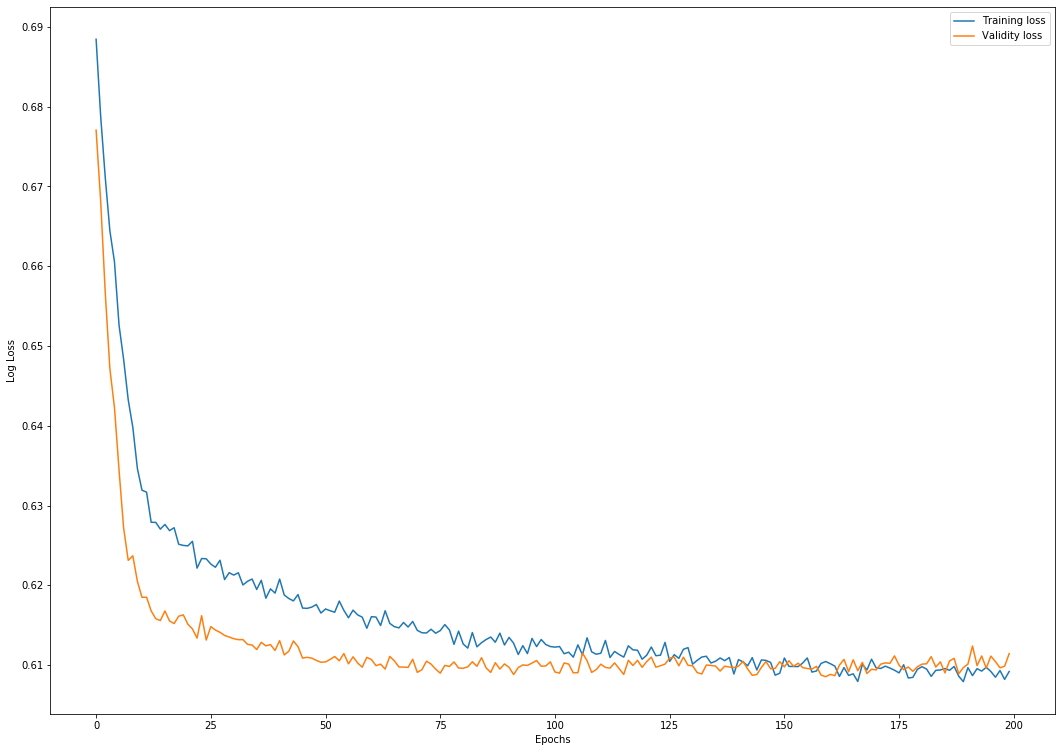

In [42]:
"""
Plotting Loss for Training vs Validity
"""
plt.figure(figsize=(18,13))
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validity loss'])
#plt.savefig('Images/Evaluation/NoD_loss.png')

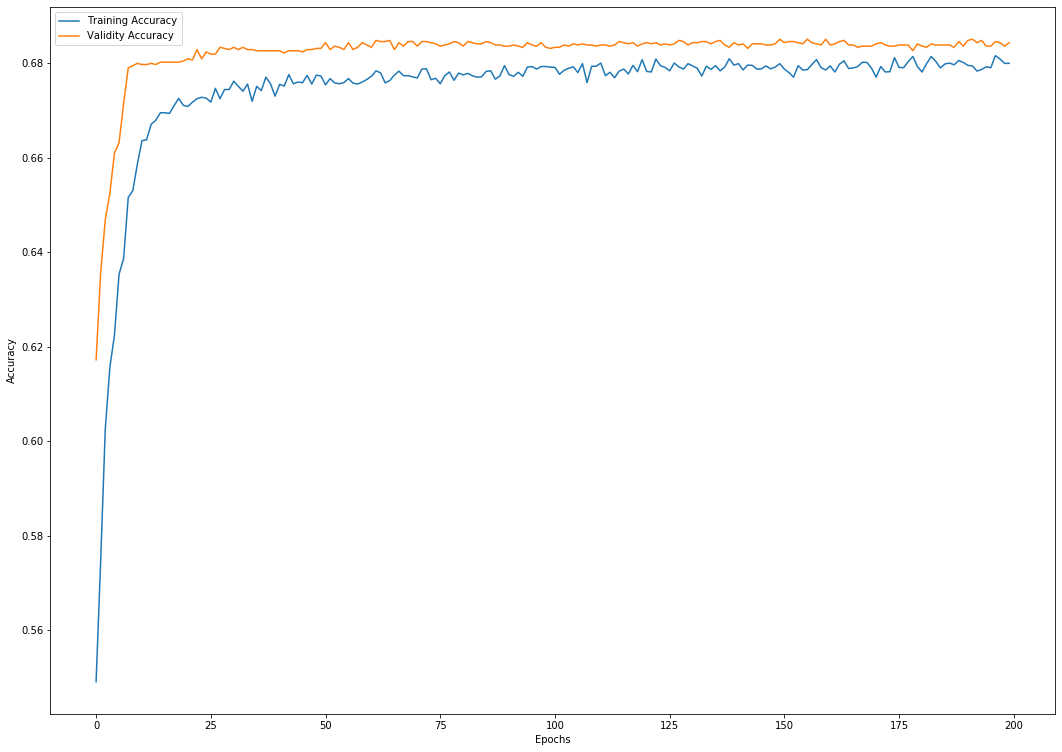

In [43]:
"""
Plotting Accuracy for Training vs Validity
"""
plt.figure(figsize=(18,13))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy', 'Validity Accuracy'])
#plt.savefig('Images/Evaluation/NoD_Accuracy.png')

In [86]:
results = model.evaluate(X_test, y_test, batch_size=50)
print("test loss, test acc:", results)

5140/5140 [==============================] - 0s 51us/step
test loss, test acc: [0.6163662857582597, 0.6756809359626548]


### Predicting test Set

In [55]:
import plotly.figure_factory as ff
Y_predict = model.predict_classes(X_test)
cf_matrix = confusion_matrix(y_test, Y_predict)

x = ['Shot No Made', 'Shot Made']
y =  ['Shot No Made', 'Shot Made']
z_text = [[str(y) for y in x] for x in cf_matrix]

fig = ff.create_annotated_heatmap(cf_matrix, x=x, y=y, annotation_text=z_text, colorscale='Viridis')
fig.show()

In [88]:
"""
Model Evaluation using Precision Recall F1Score
"""
Precision, Recall, F1Score, _ = precision_recall_fscore_support(y_test, Y_predict, average='macro')
Precision = np.round(Precision,3) 
Recall = np.round(Recall,3) 
F1Score = np.round(F1Score,3) 

<BarContainer object of 3 artists>

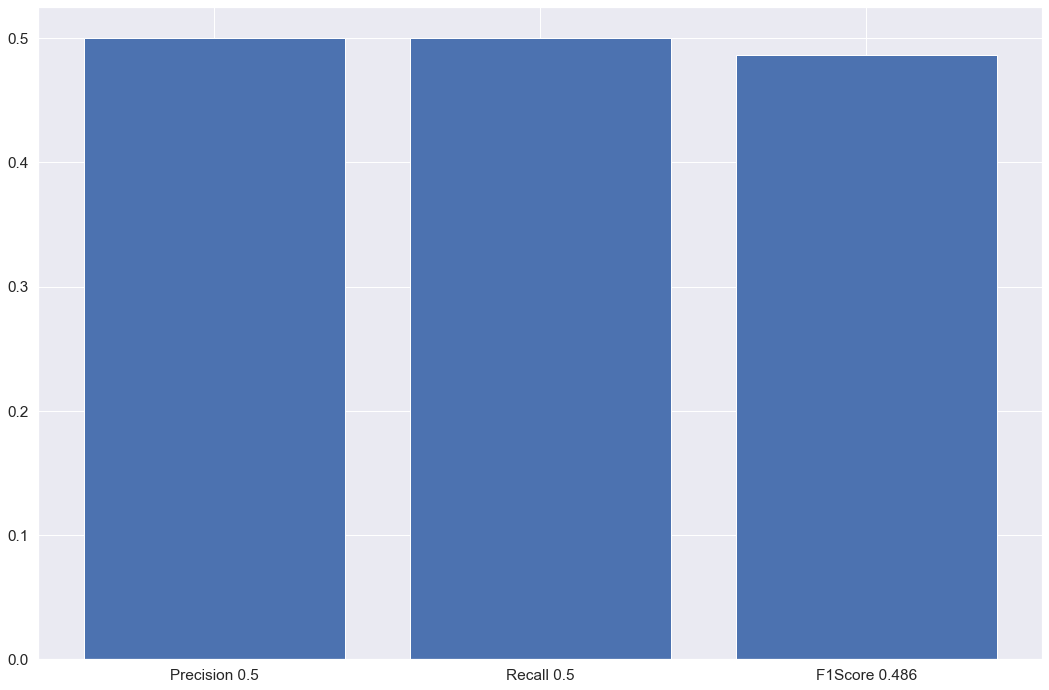

In [89]:
plt.figure(figsize=(18,12))
plt.bar(["Precision {}".format(Precision), "Recall {}".format(Recall), "F1Score {}".format(F1Score)], [Precision, Recall, F1Score])
#plt.savefig('Images/Evaluation/{}.png'.format("NoD_precision_recall_fscore"))